# <center> A comprehensive Analysis Project on Students' Performance through Python Tools 
<center> Lucas, Sydney Anne V. | DS121 

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview with Data Cleaning

In [2]:
df = pd.read_csv('Student_Performance.csv')

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.shape

(10000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## Exploratory Data Analysis

<Axes: >

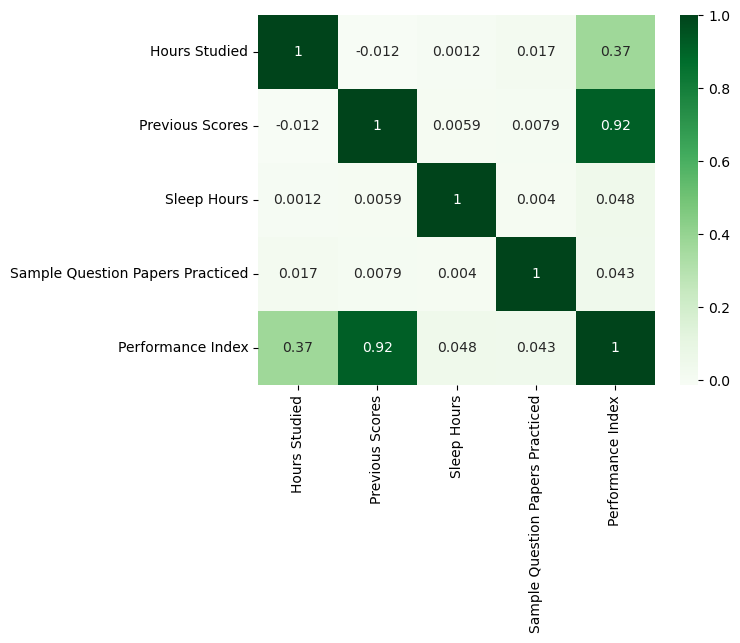

In [9]:
sns.heatmap(data=df.select_dtypes(exclude='object').corr(), annot=True, cmap='Greens')

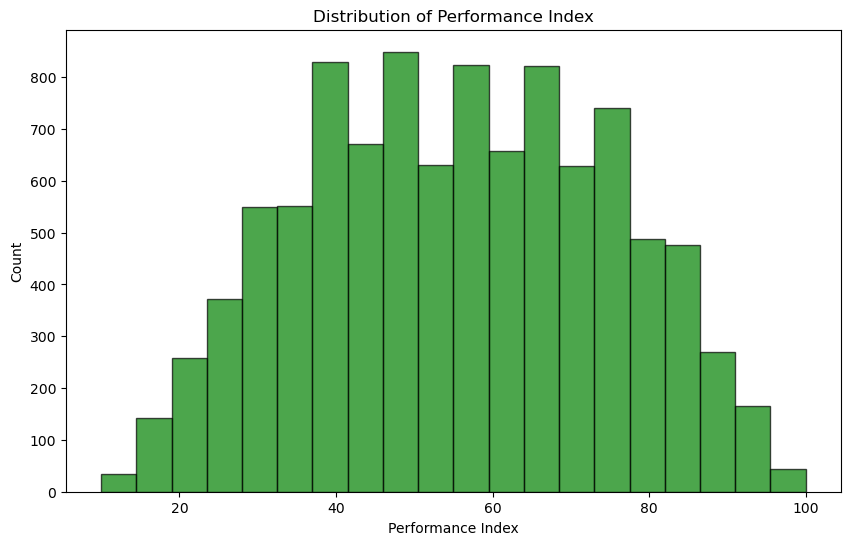

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['Performance Index'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Performance Index')
plt.ylabel('Count')
plt.title('Distribution of Performance Index')
plt.show()

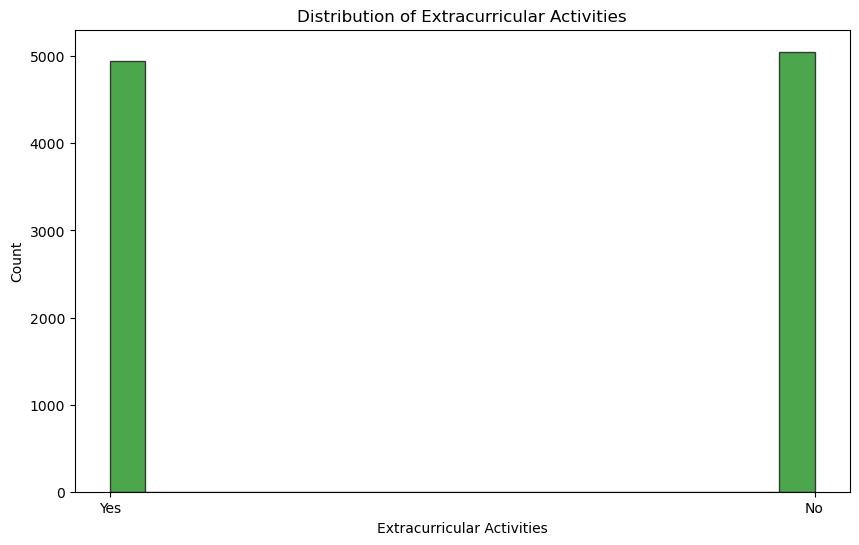

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['Extracurricular Activities'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Count')
plt.title('Distribution of Extracurricular Activities')
plt.show()

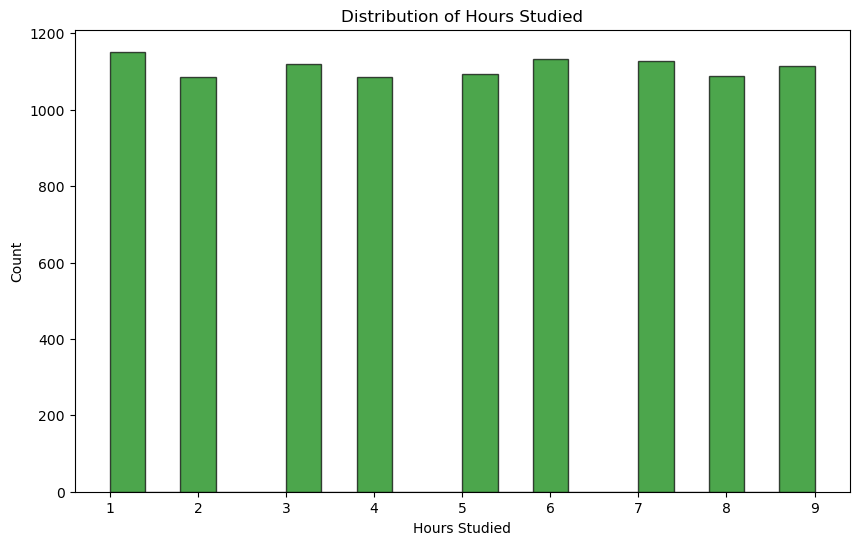

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['Hours Studied'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Hours Studied')
plt.ylabel('Count')
plt.title('Distribution of Hours Studied')
plt.show()

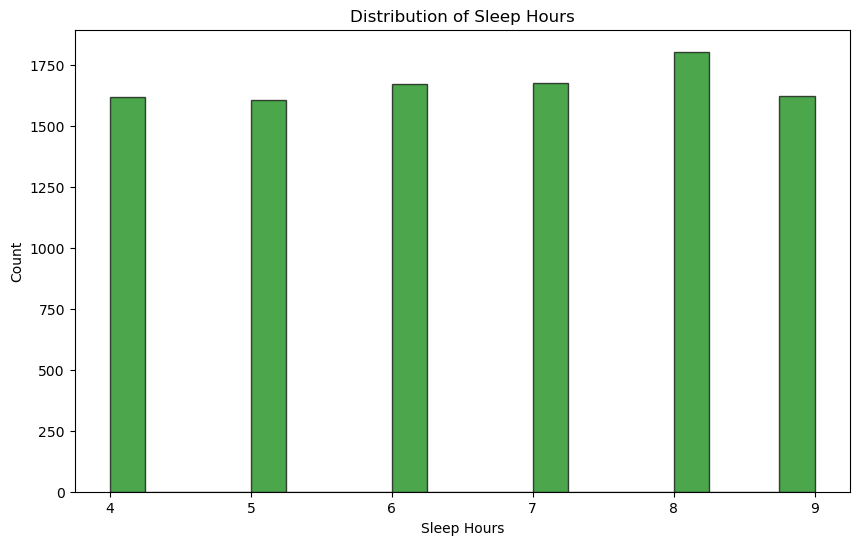

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['Sleep Hours'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Sleep Hours')
plt.ylabel('Count')
plt.title('Distribution of Sleep Hours')
plt.show()

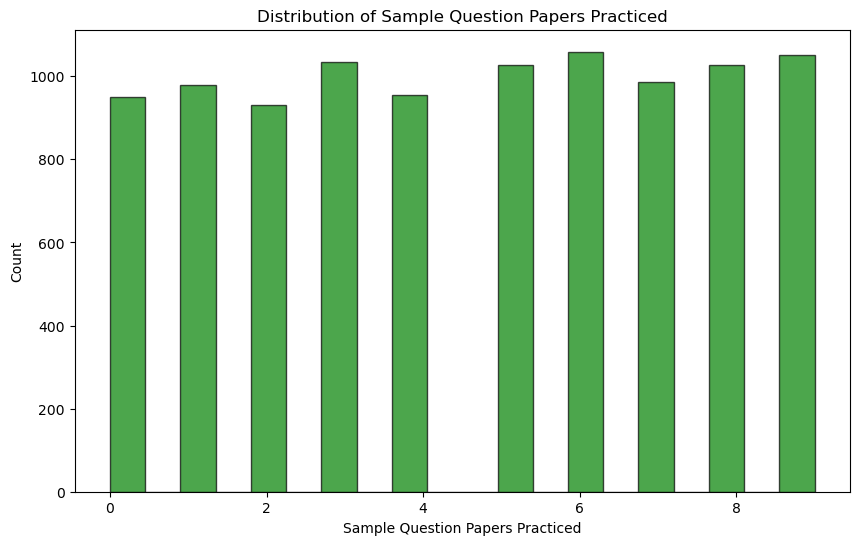

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['Sample Question Papers Practiced'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Count')
plt.title('Distribution of Sample Question Papers Practiced')
plt.show()

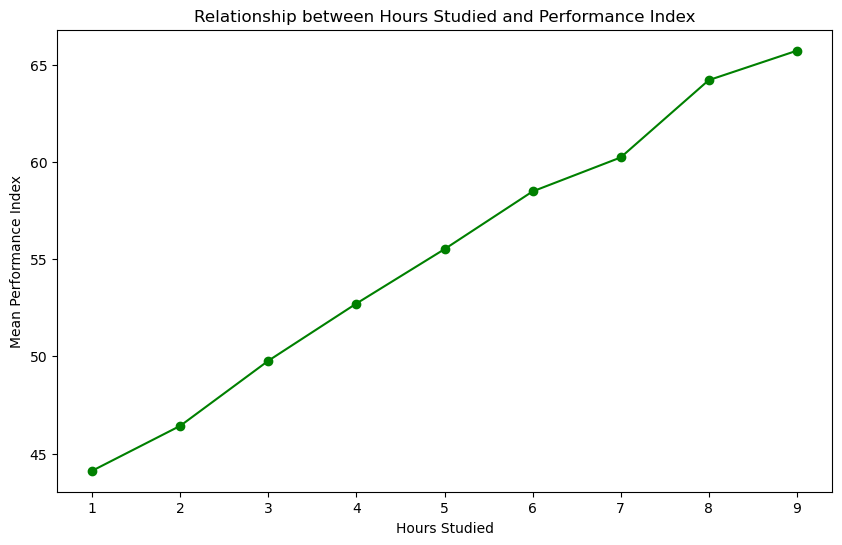

In [15]:
plt.figure(figsize=(10, 6))
mean_performance_index = df.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(mean_performance_index.index, mean_performance_index, marker='o', linestyle='-', color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Mean Performance Index')
plt.title('Relationship between Hours Studied and Performance Index')
plt.show()

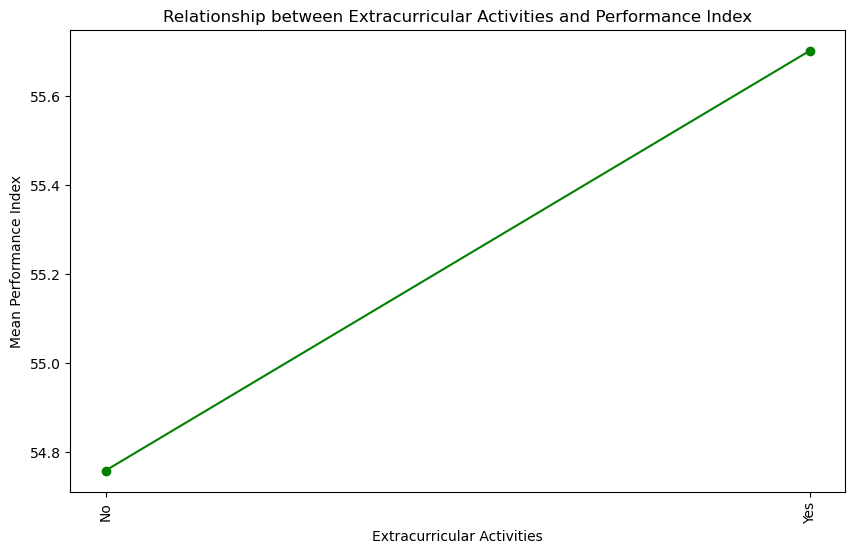

In [16]:
plt.figure(figsize=(10, 6))
mean_performance_index = df.groupby("Extracurricular Activities")["Performance Index"].mean()
plt.plot(mean_performance_index.index, mean_performance_index, marker='o', linestyle='-', color='green')
plt.xlabel("Extracurricular Activities")
plt.ylabel("Mean Performance Index")
plt.title("Relationship between Extracurricular Activities and Performance Index")
plt.xticks(rotation=90)
plt.show()

## Import

In [17]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import preprocessing
import statsmodels.api as sm
import seaborn as sb

## Regression Analysis (Simple Linear Regression)

In [18]:
Train = df.drop(columns = "Performance Index")
Target = df["Performance Index"]
Target

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [19]:
df_encoded = pd.get_dummies(df, columns=["Extracurricular Activities"])
X = df_encoded.drop(columns=["Performance Index"])
y = df_encoded["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print('The Model Score:', model.score(X_train, y_train))
y_pred = model.predict(X_test)
predict = np.round(y_pred, decimals=1)

print('Made Predictions:', predict)

The Model Score: 0.9886898790682355
Made Predictions: [54.7 22.6 47.9 ... 16.8 63.3 45.9]


In [20]:
data = pd.read_csv("Student_Performance.csv")
data = data.apply(preprocessing.LabelEncoder().fit_transform)

df = pd.DataFrame(data)
data_columns = df[["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]].values
performance_index = df[["Performance Index"]].values

data_columns_dataframe = pd.DataFrame(data=data_columns, index=range(10000), columns=['HS', 'PS.', 'EA', 'SH', 'SQPP'])
data_performance_index = pd.DataFrame(data=performance_index, index=range(10000), columns=['PI'])

X = np.append(arr=np.ones((10000, 1)).astype(int), values=data_columns_dataframe, axis=1)
X_l = data_columns_dataframe.iloc[:, [0, 1, 2, 3, 4]].values
X_l = np.array(X_l, dtype=float)

model = sm.OLS(data_performance_index, X_l).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                     PI   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.114e+06
Date:                Fri, 09 Feb 2024   Prob (F-statistic):                        0.00
Time:                        04:17:54   Log-Likelihood:                         -21511.
No. Observations:               10000   AIC:                                  4.303e+04
Df Residuals:                    9995   BIC:                                  4.307e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
x_train,x_test,y_train,y_test =train_test_split(data_columns_dataframe,data_performance_index,test_size=0.33,random_state=0)

regressor = LinearRegression()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

accuracies = []
accuracy = regressor.score(x_test,y_test)
accuracies.append(accuracy)
print("RESULTS")
print("Average: ", sum(accuracies) / len(accuracies))
print("R2-Score: ", metrics.r2_score(y_test, y_pred))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Predict: ",y_pred)

RESULTS
Average:  0.9887737605688379
R2-Score:  0.9887737605688379
Mean Absolute Error:  1.5967903300361925
Mean Squared Error:  4.047918343888734
Root Mean Squared Error:  2.011943921656052
Predict:  [[40.46265133]
 [43.0734076 ]
 [68.26772378]
 ...
 [70.1794484 ]
 [49.2325139 ]
 [41.6701361 ]]


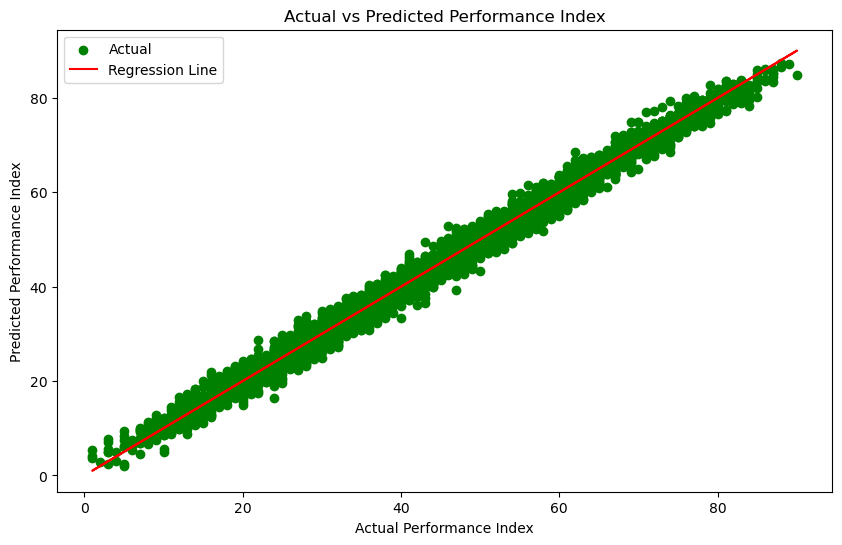

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Actual')
plt.plot(y_test, y_test, color='red', label='Regression Line')
plt.title('Actual vs Predicted Performance Index')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.legend()
plt.show()

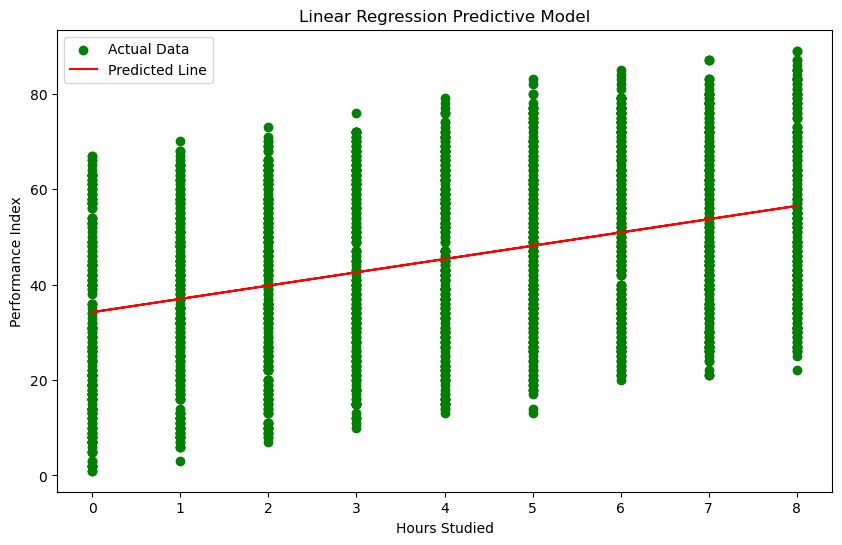

In [23]:
X = df[['Hours Studied']]
y = df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='green', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.title("Linear Regression Predictive Model")
plt.legend()
plt.show()

---